In [313]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as st
import pingouin as pg
%matplotlib inline 

In [314]:
data = pd.read_csv('eel.csv')
data.head()

,Cured,Intervention,Duration
0,Not Cured,No Treatment,7
1,Not Cured,No Treatment,7
2,Not Cured,No Treatment,6
3,Cured,No Treatment,8
4,Cured,Intervention,7


In [315]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Cured         113 non-null    object
 1   Intervention  113 non-null    object
 2   Duration      113 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ KB


In [316]:
data['Cured'].unique()

array(['Not Cured', 'Cured'], dtype=object)

In [317]:
data['Intervention'].unique()

array(['No Treatment', 'Intervention'], dtype=object)

In [318]:
data['Curedx'] = data['Cured'].replace({'Not Cured':0,'Cured':1 })
data['Interventionx'] = data['Intervention'].replace({'No Treatment':0,'Intervention':1 })

In [319]:
data.head()

,Cured,Intervention,Duration,Curedx,Interventionx
0,Not Cured,No Treatment,7,0,0
1,Not Cured,No Treatment,7,0,0
2,Not Cured,No Treatment,6,0,0
3,Cured,No Treatment,8,1,0
4,Cured,Intervention,7,1,1


In [320]:
from statsmodels.tools.tools import add_constant
data=add_constant(data)

In [321]:
m01 = sm.Logit(data['Curedx'] , data[['const', 'Interventionx']]).fit()
m01.summary()

Optimization terminated successfully.
         Current function value: 0.637866
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Curedx   No. Observations:                  113
Model:                          Logit   Df Residuals:                      111
Method:                           MLE   Df Model:                            1
Date:                Fri, 03 Jul 2020   Pseudo R-squ.:                 0.06442
Time:                        19:03:39   Log-Likelihood:                -72.079
converged:                       True   LL-Null:                       -77.042
Covariance Type:            nonrobust   LLR p-value:                  0.001629
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.2877      0.270     -1.065      0.287      -0.817       0.242
Interventionx     1.2287      0.400      3.074      0.002       0.445       2.012
=================================================================================
"""

AIC =      -2 * log_likelihood + 2 * k

In [322]:
AIC = -2*(-72.079)+ 2*2
AIC

148.158

In [323]:
print(m01.llf)           #get Log-Likelihood
print(m01.llr)           #get chi-square
print(m01.llr_pvalue)    #get sig. level of chi-square test
print(m01.prsquared)     #get pseudo-rsquared 

-72.07890183908265
9.92620121727586
0.0016294247428933915
0.06442071144251227


In [324]:
-2*(m01.llnull-m01.llf)

9.92620121727586

In [325]:
m01.llr

9.92620121727586

### **chi-square = deviance_null - deviance_new**

In [326]:
chi_square  = (-2*(-77.042))-(-2*(-72.079))          # previous_deviance - present_deviance
chi_square

9.926000000000016

### **Note: The model chi-square is an analogue of the F-test for the linear regression**

#### see https://www.statsmodels.org/stable/generated/statsmodels.discrete.discrete_model.LogitResults.html

In [327]:
m01.aic

148.1578036781653

In [328]:
m01.bic

153.61257931558998

In [329]:
m01.bse

const            0.270031
Interventionx    0.399759
dtype: float64

In [330]:
m01.prsquared

0.06442071144251227

In [331]:
m01.resid_dev

0     -1.057937
1     -1.057937
2     -1.057937
3      1.301766
4      0.811763
         ...   
108    0.811763
109    0.811763
110   -1.057937
111   -1.057937
112    0.811763
Length: 113, dtype: float64

#### chi_df = This creates a value called chidf that is the degrees of freedom for the model  subtracted from the degrees of freedom for the null model. 

In [332]:
chi_df = 112-111
chi_df

1

In [333]:
z_statsistics = 3.074  # from model
deviance_null = -2*m01.llnull

In [334]:
R  = np.sqrt((z_statsistics**2 - 2*chi_df)/deviance_null)
R

0.21987916734928623

#### The three different R_Squared given in book:

In [335]:
deviance_new = -2*m01.llf
deviance_new

144.1578036781653

In [336]:
def R2(deviance_null, deivance_new, n):
    R2_l = (deviance_null-deviance_new)/deviance_null
    R2_cs = 1-np.exp((deviance_new-deviance_null)/n)
    R2_n = R2_cs/(1-np.exp(-(deviance_null/n)))
    print("pseudo R^2 for logistic regression:\n")
    print(f"Hosmer and Lemeshow R^2: {R2_l}\n")
    print(f"Cox and Snell R^2: {R2_cs} \n")
    print(f"Nagelkerke R^2 : {R2_n}\n")

In [337]:
R2(deviance_null, deviance_new, len(data))

pseudo R^2 for logistic regression:

Hosmer and Lemeshow R^2: 0.06442071144251225

Cox and Snell R^2: 0.08409486918276288 

Nagelkerke R^2 : 0.11299197843845539



In [338]:
np.exp(m01.conf_int())

,0,1
const,0.441785,1.273245
Interventionx,1.560729,7.479589


In [339]:
m01.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
================================================================
Model:              Logit            Pseudo R-squared: 0.064    
Dependent Variable: Curedx           AIC:              148.1578 
Date:               2020-07-03 19:03 BIC:              153.6126 
No. Observations:   113              Log-Likelihood:   -72.079  
Df Model:           1                LL-Null:          -77.042  
Df Residuals:       111              LLR p-value:      0.0016294
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     5.0000                                      
----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025 0.975]
----------------------------------------------------------------
const             -0.2877   0.2700 -1.0654 0.2867 -0.8169 0.2416
Interventionx      1.2287   0.3998  3.0735 0.0021  0.4452 2.0122
================================================================

"""

In [340]:
m01.fittedvalues

0     -0.287682
1     -0.287682
2     -0.287682
3     -0.287682
4      0.940983
         ...   
108    0.940983
109    0.940983
110   -0.287682
111   -0.287682
112    0.940983
Length: 113, dtype: float64

In [341]:
1/(1+np.exp(-(m01.fittedvalues)))

0      0.428571
1      0.428571
2      0.428571
3      0.428571
4      0.719298
         ...   
108    0.719298
109    0.719298
110    0.428571
111    0.428571
112    0.719298
Length: 113, dtype: float64

In [342]:
m02 = sm.Logit(data['Curedx'] , data[['const', 'Interventionx','Duration']]).fit()
m02.summary()

Optimization terminated successfully.
         Current function value: 0.637858
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Curedx   No. Observations:                  113
Model:                          Logit   Df Residuals:                      110
Method:                           MLE   Df Model:                            2
Date:                Fri, 03 Jul 2020   Pseudo R-squ.:                 0.06443
Time:                        19:03:42   Log-Likelihood:                -72.078
converged:                       True   LL-Null:                       -77.042
Covariance Type:            nonrobust   LLR p-value:                  0.006984
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.2347      1.221     -0.192      0.848      -2.627       2.158
Interventionx     1.2335      0.415      2.975      0.003       0.421       2.046
Duration         -0.0078      0.176     -0.045      0.964      -0.353       0.337
=================================================================================
"""

In [343]:
m02.llf*(-2)     # deviance of m02

144.15582014989994

In [344]:
m02.resid_dev.head()

0   -1.057199
1   -1.057199
2   -1.060374
3    1.306008
4    0.810711
dtype: float64

In [345]:
model_chi = -2*(m01.llf - m02.llf)     # previous_deviance - present_deviance
model_chi

0.0019835282653559716

In [346]:
chi_df = 111 - 110
chi_df

1

In [347]:
1 - st.chi2.cdf(model_chi, chi_df)

0.9644765035961966

In [348]:
from statsmodels.genmod import families

In [349]:
res = sm.GLM(data['Curedx'] , data[['const', 'Interventionx','Duration']],
          family=families.Binomial()).fit(attach_wls=True, atol=1e-10)
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Curedx   No. Observations:                  113
Model:                            GLM   Df Residuals:                      110
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -72.078
Date:                Fri, 03 Jul 2020   Deviance:                       144.16
Time:                        19:03:42   Pearson chi2:                     113.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.2347      1.221     -0.192

In [350]:
infl = res.get_influence(observed=False)

In [351]:
summ_df = infl.summary_frame()
summ_df.sort_values('standard_resid', ascending=False)[:10]

,dfb_const,dfb_Interventionx,dfb_Duration,cooks_d,standard_resid,hat_diag,dffits_internal
40,-0.197143,-0.170641,0.239493,0.028150,1.198593,0.055520,0.290602
80,-0.197143,-0.170641,0.239493,0.028150,1.198593,0.055520,0.290602
3,-0.089777,-0.137947,0.128271,0.013978,1.177701,0.029347,0.204779
8,-0.089777,-0.137947,0.128271,0.013978,1.177701,0.029347,0.204779
36,-0.089777,-0.137947,0.128271,0.013978,1.177701,0.029347,0.204779
12,0.215020,-0.055470,-0.184177,0.019845,1.171349,0.041587,0.243998
86,0.215020,-0.055470,-0.184177,0.019845,1.171349,0.041587,0.243998
38,0.215020,-0.055470,-0.184177,0.019845,1.171349,0.041587,0.243998
75,0.011466,-0.108796,0.023927,0.008438,1.166456,0.018266,0.159108
78,0.011466,-0.108796,0.023927,0.008438,1.166456,0.018266,0.159108


## **Diagnostic statistics**

### You need to look for cases that might be influencing the logistic regression model:


#### i) Look at standardized residuals and check that no more than 5% of cases have absolute values above 2, and that no more than about 1% have absolute values above 2.5. Any case with a value above about 3 could be an outlier.



#### ii)  Calculate the average leverage (the number of predictors plus 1, divided by the sample size) and then look for values greater than twice or three times this average value.



#### iii)  Look for absolute values of DFBeta greater than 1.

In [352]:
pen_df = pd.read_csv('penalty.csv')

In [353]:
pen_df.drop(['Unnamed: 4'], inplace=True, axis=1)

In [354]:
pen_df.head()

,PSWQ,Anxious,Previous,Scored
0,18,21,56,Scored
1,17,32,35,Scored
2,16,34,35,Scored
3,14,40,15,Scored
4,5,24,47,Scored


In [355]:
pen_df['Scored'].unique()

array(['Scored', 'Missed'], dtype=object)

In [356]:
pen_df['Scoredx']  = pen_df['Scored'].replace({'Scored':1, 'Missed':0})

In [357]:
pen_df = add_constant(pen_df)

In [358]:
p01 = sm.Logit(pen_df['Scoredx'], pen_df[['const', 'PSWQ', 'Previous']]).fit()
p01.summary()

Optimization terminated successfully.
         Current function value: 0.324412
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Scoredx   No. Observations:                   75
Model:                          Logit   Df Residuals:                       72
Method:                           MLE   Df Model:                            2
Date:                Fri, 03 Jul 2020   Pseudo R-squ.:                  0.5305
Time:                        19:03:44   Log-Likelihood:                -24.331
converged:                       True   LL-Null:                       -51.819
Covariance Type:            nonrobust   LLR p-value:                 1.153e-12
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2803      1.670      0.767      0.443      -1.993       4.554
PSWQ          -0.2301      0.080     -2.882      0.004      -0.387      -0.074
Previous       0.0648      0.022      2.934      0.003       0.022       0.108
==============================================================================
"""

In [359]:
model1_chi_sq = -2*(p01.llnull - p01.llf)   # p01.llr
model1_chi_sq

54.97669239214833

In [360]:
p02 = sm.Logit(pen_df['Scoredx'], pen_df[['const',  'PSWQ', 'Previous', 'Anxious']]).fit()
p02.summary()

Optimization terminated successfully.
         Current function value: 0.316104
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Scoredx   No. Observations:                   75
Model:                          Logit   Df Residuals:                       71
Method:                           MLE   Df Model:                            3
Date:                Fri, 03 Jul 2020   Pseudo R-squ.:                  0.5425
Time:                        19:03:44   Log-Likelihood:                -23.708
converged:                       True   LL-Null:                       -51.819
Covariance Type:            nonrobust   LLR p-value:                 3.765e-12
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.4926     11.802     -0.974      0.330     -34.624      11.638
PSWQ          -0.2514      0.084     -2.992      0.003      -0.416      -0.087
Previous       0.2026      0.129      1.567      0.117      -0.051       0.456
Anxious        0.2758      0.253      1.092      0.275      -0.219       0.771
==============================================================================
"""

In [361]:
model1_chi_sq_2 = -2*(p01.llf - p02.llf)   
model1_chi_sq_2

1.246266751259725

In [362]:
print(p01.aic)
print(p02.aic)

54.66180402298753
55.41553727172781


In [363]:
print(p01.bic)
print(p02.bic)

61.614268363596466
64.68548972587305


In [364]:
model1_chi = p01.llf
model1_chidf = 2   #df_model

In [365]:
copy_df = pen_df.copy()

In [366]:
copy_df.drop(['Scored','Scoredx'], inplace=True, axis=1)

In [367]:
copy_df .head()

,const,PSWQ,Anxious,Previous
0,1.0,18,21,56
1,1.0,17,32,35
2,1.0,16,34,35
3,1.0,14,40,15
4,1.0,5,24,47


In [368]:
cov = p02.cov_params()
corr = cov / p02.bse / p02.bse[:, None]
vif = np.diag(np.linalg.inv(corr.values[1:, 1:]))[[1, 0, 2]]

In [369]:
vif

array([35.22707635,  1.08976625, 35.58192988])

#### https://stats.stackexchange.com/questions/474964/calculating-variance-inflation-factor-for-logistic-regression-using-statsmodels/475233#475233

### **Testing for linearity of the logit**

In [370]:
pen_df.head()

,const,PSWQ,Anxious,Previous,Scored,Scoredx
0,1.0,18,21,56,Scored,1
1,1.0,17,32,35,Scored,1
2,1.0,16,34,35,Scored,1
3,1.0,14,40,15,Scored,1
4,1.0,5,24,47,Scored,1


In [371]:
pen_df['log_PSWQ'] = np.log(pen_df['PSWQ'])*pen_df['PSWQ']
pen_df['log_Anxious'] = np.log(pen_df['Anxious'])*pen_df['Anxious']
pen_df['log_Previous'] = np.log(pen_df['Previous']+1)*pen_df['Previous']

In [372]:
p03 = sm.Logit(pen_df['Scoredx'], pen_df[['const',  'PSWQ', 'Previous', 'Anxious','log_PSWQ', 'log_Anxious', 'log_Previous']]).fit()
p03.summary()

Optimization terminated successfully.
         Current function value: 0.306062
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Scoredx   No. Observations:                   75
Model:                          Logit   Df Residuals:                       68
Method:                           MLE   Df Model:                            6
Date:                Fri, 03 Jul 2020   Pseudo R-squ.:                  0.5570
Time:                        19:03:47   Log-Likelihood:                -22.955
converged:                       True   LL-Null:                       -51.819
Covariance Type:            nonrobust   LLR p-value:                 1.300e-10
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -3.5721     15.008     -0.238      0.812     -32.988      25.844
PSWQ            -0.4222      1.103     -0.383      0.702      -2.583       1.739
Previous         1.6691      1.480      1.128      0.259      -1.232       4.570
Anxious         -2.6480      2.793     -0.948      0.343      -8.122       2.826
log_PSWQ         0.0439      0.297      0.148      0.882      -0.538       0.625
log_Anxious      0.6815      0.652      1.046      0.296      -0.596       1.959
log_Previous    -0.3192      0.317     -1.007      0.314      -0.940       0.302
================================================================================
"""

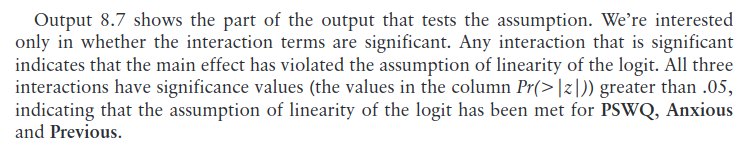

In [373]:
from IPython.display import Image
Image('logit_linearity.png')

###  **one more example**

In [374]:
suicide_df = pd.read_csv('suicide.csv')

In [375]:
suicide_df

,Age,Age_Group,Drug_Use,Father_Negligence,Gender,Isolation,Marital_Status,Meaninglessness,Metal,Mother_Negligence,Normlessness,Self_Estrangement,Suicide_Risk,Vicarious,Worshipping
0,15.83,14-16,8.0,17,Female,6.0,Together,10.0,4.83,10.0,6,15,Non-Suicidal,5,4
1,14.92,14-16,9.0,23,Female,8.0,Together,26.0,6.00,12.0,8,20,Non-Suicidal,4,6
2,15.33,14-16,5.0,15,Female,18.0,Together,19.0,6.00,16.0,7,17,Non-Suicidal,6,3
3,15.83,14-16,11.0,11,Female,9.0,Separated,13.0,4.00,10.0,5,12,Non-Suicidal,3,3
4,14.92,14-16,7.0,13,Female,5.0,Together,13.0,8.00,16.0,3,6,Non-Suicidal,3,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,15.50,14-16,11.0,12,Female,4.0,Together,14.0,18.00,12.0,14,15,Non-Suicidal,7,8
117,15.58,14-16,5.0,16,Female,14.0,Together,29.0,4.00,12.0,13,14,Non-Suicidal,5,6
118,15.58,14-16,4.0,13,Female,8.0,Together,15.0,5.00,13.0,8,16,Non-Suicidal,5,3
119,15.67,14-16,7.0,20,Female,6.0,Together,14.0,6.00,18.0,4,11,Non-Suicidal,7,4


In [376]:
suicide_df['Suicide_Riskx'] = suicide_df['Suicide_Risk'].replace({'Non-Suicidal':0, 'Suicidal':1})
suicide_df['Marital_Statusx'] = suicide_df['Marital_Status'].replace({'Together':0, 'Separated':1})

In [377]:
suicide_df= add_constant(suicide_df)

In [378]:
s01 = sm.Logit(suicide_df['Suicide_Riskx'], suicide_df[['const', 'Age', 'Marital_Statusx', 'Mother_Negligence', 'Father_Negligence', 'Self_Estrangement', 'Isolation', 'Normlessness', 'Meaninglessness', 'Drug_Use', 'Metal', 'Worshipping', 'Vicarious']]).fit()
s01.summary()

Optimization terminated successfully.
         Current function value: 0.351710
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Suicide_Riskx   No. Observations:                  121
Model:                          Logit   Df Residuals:                      108
Method:                           MLE   Df Model:                           12
Date:                Fri, 03 Jul 2020   Pseudo R-squ.:                  0.3720
Time:                        19:03:48   Log-Likelihood:                -42.557
converged:                       True   LL-Null:                       -67.767
Covariance Type:            nonrobust   LLR p-value:                 1.179e-06
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -19.0110      6.209     -3.062      0.002     -31.180      -6.842
Age                   0.6928      0.323      2.142      0.032       0.059       1.327
Marital_Statusx       0.1833      0.677      0.271      0.787      -1.144       1.511
Mother_Negligence    -0.0196      0.053     -0.368      0.713      -0.124       0.085
Father_Negligence     0.0846      0.048      1.769      0.077      -0.009       0.178
Self_Estrangement     0.1551      0.065      2.393      0.017       0.028       0.282
Isolation            -0.0058      0.076     -0.076      0.939      -0.155       0.143
Normlessness          0.1913      0.109      1.758      0.079      -0.022       0.405
Meaninglessness      -0.0666      0.061     -1.092      0.275      -0.186       0.053
Drug_Use              0.3169      0.103      3.074      0.002       0.115       0.519
Metal                 0.1355      0.092      1.478      0.140      -0.044       0.315
Worshipping           0.1589      0.129      1.227      0.220      -0.095       0.413
Vicarious            -0.3418      0.196     -1.741      0.082      -0.727       0.043
=====================================================================================
"""

In [379]:
s01.llf

-42.55690318343585

In [380]:
s01.llnull

-67.76651948157144

In [381]:
model_chisq = s01.llr
model_chisq

50.41923259627117

In [382]:
model_chidf = 12

### i) checking assumption of multicollinearity

In [383]:
cov1 = s01.cov_params()
corr1 = cov1 / s01.bse / s01.bse[:, None]

In [384]:
vif1 = np.diag(np.linalg.inv(corr1.values[1:, 1:]))
vif1

array([1.4001256 , 1.25315816, 1.24901111, 1.49378292, 1.55399185,
       1.54109805, 1.24897438, 1.35521829, 1.44768724, 1.11751563,
       1.42800567, 1.62931734])

### **upon seeing the vif we can conclude that there multicollinearity is not an issue here.**

### ii) checking assumptions of linearity

In [385]:
suicide_df_ = suicide_df[['const', 'Age', 'Marital_Statusx', 'Mother_Negligence', 'Father_Negligence', 'Self_Estrangement', 'Isolation', 'Normlessness', 'Meaninglessness', 'Drug_Use', 'Metal', 'Worshipping', 'Vicarious']]

In [386]:
for i in suicide_df_.columns:
    if (i=='const') or (i=='Marital_Statusx'):
        pass
    else:
        #print(i)
        v = f'log_{i}'
        suicide_df_[v]  = np.log(suicide_df_[i])*suicide_df_[i]

/home/atrides/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [387]:
s02 = sm.Logit(suicide_df['Suicide_Riskx'], suicide_df_).fit()
s02.summary()

Optimization terminated successfully.
         Current function value: 0.285688
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Suicide_Riskx   No. Observations:                  121
Model:                          Logit   Df Residuals:                       97
Method:                           MLE   Df Model:                           23
Date:                Fri, 03 Jul 2020   Pseudo R-squ.:                  0.4899
Time:                        19:03:50   Log-Likelihood:                -34.568
converged:                       True   LL-Null:                       -67.767
Covariance Type:            nonrobust   LLR p-value:                 4.321e-06
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -44.6609    203.270     -0.220      0.826    -443.062     353.740
Age                       6.4717     48.972      0.132      0.895     -89.512     102.455
Marital_Statusx          -0.0549      0.906     -0.061      0.952      -1.832       1.722
Mother_Negligence         0.9138      1.420      0.643      0.520      -1.870       3.698
Father_Negligence        -2.4808      1.548     -1.602      0.109      -5.515       0.553
Self_Estrangement        -2.4526      1.207     -2.033      0.042      -4.818      -0.088
Isolation                 1.6328      1.293      1.262      0.207      -0.902       4.168
Normlessness              3.5364      2.752      1.285      0.199      -1.857       8.930
Meaninglessness          -1.0929      1.766     -0.619      0.536      -4.555       2.369
Drug_Use                  1.9384      2.485      0.780      0.435      -2.932       6.808
Metal                     2.7275      1.869      1.459      0.144      -0.935       6.390
Worshipping              -2.0337      2.536     -0.802      0.423      -7.004       2.936
Vicarious                 0.0873      2.661      0.033      0.974      -5.128       5.303
log_Age                  -1.4851     12.930     -0.115      0.909     -26.827      23.857
log_Mother_Negligence    -0.2596      0.374     -0.695      0.487      -0.992       0.473
log_Father_Negligence     0.6516      0.393      1.660      0.097      -0.118       1.421
log_Self_Estrangement     0.7315      0.332      2.202      0.028       0.080       1.383
log_Isolation            -0.4976      0.381     -1.305      0.192      -1.245       0.250
log_Normlessness         -0.9924      0.865     -1.148      0.251      -2.687       0.702
log_Meaninglessness       0.2496      0.453      0.551      0.582      -0.639       1.138
log_Drug_Use             -0.5359      0.789     -0.679      0.497      -2.082       1.011
log_Metal                -0.7923      0.586     -1.353      0.176      -1.940       0.356
log_Worshipping           0.7721      0.894      0.863      0.388      -0.980       2.525
log_Vicarious            -0.1666      1.034     -0.161      0.872      -2.193       1.860
=========================================================================================
"""

### **since none of the coeffecients corresponding to log terms are significant , our model passes assumption of linearity**

## **Multinomial logistic regression**

In [388]:
# Open both files
with open("Chat-Up Lines.dat") as f_in, open("outfile.csv", 'w') as f_out:
    # Write header unchanged
    header = f_in.readline()
    f_out.write(header)

    # Transform the rest of the lines
    for line in f_in:
        line = line.replace(' ', '')
        f_out.write(line)

In [389]:
chat_up  = pd.read_csv('outfile.csv', delim_whitespace=True)

In [390]:
chat_up.head()

,Success,Funny,Sex,Good_Mate,Gender
0,GetPhoneNumber,3,7,6,Male
1,GoHomewithPerson,5,7,2,Male
2,GetPhoneNumber,4,6,6,Male
3,GoHomewithPerson,3,7,5,Male
4,GetPhoneNumber,5,1,6,Male


In [391]:
chat_up['Success'].unique()

array(['GetPhoneNumber', 'GoHomewithPerson', 'Noresponse/WalkOff'],
      dtype=object)

In [392]:
chat_up['Successx'] = chat_up['Success'].replace({'GetPhoneNumber':1, 'GoHomewithPerson':2, 'Noresponse/WalkOff':0})

In [393]:
chat_up['Genderx'] = chat_up['Gender'].replace({'Male':0, 'Female':1})

In [394]:
chat_up['Gen_Funny'] = chat_up['Genderx'] * chat_up['Funny']
chat_up['Gen_Sex'] = chat_up['Genderx'] * chat_up['Sex']

In [395]:
import statsmodels.formula.api as smf
ml01 = smf.mnlogit('Successx ~ Funny + Sex + Good_Mate +Genderx+Gen_Funny+ Gen_Sex', chat_up).fit()

Optimization terminated successfully.
         Current function value: 0.851702
         Iterations 7


In [396]:
ml01.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:               Successx   No. Observations:                 1020
Model:                        MNLogit   Df Residuals:                     1006
Method:                           MLE   Df Model:                           12
Date:                Fri, 03 Jul 2020   Pseudo R-squ.:                  0.1382
Time:                        19:03:52   Log-Likelihood:                -868.74
converged:                       True   LL-Null:                       -1008.0
Covariance Type:            nonrobust   LLR p-value:                 1.496e-52
==============================================================================
Successx=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.7831      0.670     -2.662      0.008      -3.096      -0.470
Funny          0.1394      0.110      1.266      0.206      -0.076       0.355
Sex            0.2762      0.089      3.097      0.002       0.101       0.451
Good_Mate      0.1318      0.054      2.454      0.014       0.027       0.237
Genderx       -1.6462      0.796     -2.067      0.039      -3.207      -0.086
Gen_Funny      0.4924      0.140      3.518      0.000       0.218       0.767
Gen_Sex       -0.3483      0.106     -3.290      0.001      -0.556      -0.141
------------------------------------------------------------------------------
Successx=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.2864      0.941     -4.553      0.000      -6.131      -2.441
Funny          0.3185      0.125      2.542      0.011       0.073       0.564
Sex            0.4173      0.122      3.418      0.001       0.178       0.657
Good_Mate      0.1300      0.084      1.557      0.120      -0.034       0.294
Genderx       -5.6264      1.329     -4.235      0.000      -8.230      -3.022
Gen_Funny      1.1724      0.199      5.884      0.000       0.782       1.563
Gen_Sex       -0.4766      0.163     -2.916      0.004      -0.797      -0.156
==============================================================================
"""

### see     https://stats.stackexchange.com/questions/202264/multinomial-logit-mlogit-vs-statsmodels

In [397]:
np.exp(ml01.params)

,0,1
Intercept,0.168121,0.013755
Funny,1.149571,1.375004
Sex,1.318120,1.517832
Good_Mate,1.140926,1.138850
Genderx,0.192776,0.003601
Gen_Funny,1.636307,3.229789
Gen_Sex,0.705869,0.620866


### **Checking Assumptions**

#### Assumption of Multicollinearity

In [398]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [399]:
chat_up_ = chat_up.copy()

In [400]:
chat_up_.drop(['Success', 'Successx', 'Gender','Gen_Funny', 'Gen_Sex'], inplace=True, axis=1)

In [401]:
chat_up_

,Funny,Sex,Good_Mate,Genderx
0,3,7,6,0
1,5,7,2,0
2,4,6,6,0
3,3,7,5,0
4,5,1,6,0
...,...,...,...,...
1015,5,6,6,1
1016,3,9,6,1
1017,4,7,7,1
1018,6,7,6,1


In [402]:
chat_up_ = add_constant(chat_up_)

In [403]:
vif = pd.Series([variance_inflation_factor(chat_up_.values, i) 
               for i in range(1, chat_up_.shape[1])], 
              index=chat_up_.columns[1:])

In [404]:
vif

Funny        1.264375
Sex          1.017911
Good_Mate    1.028197
Genderx      1.218566
dtype: float64

In [405]:
tolerance = 1/vif
tolerance

Funny        0.790905
Sex          0.982404
Good_Mate    0.972576
Genderx      0.820637
dtype: float64

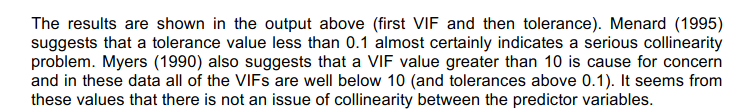

In [406]:
Image('vif.png')

### Assumption of Linearity

In [407]:
chat_up_

,const,Funny,Sex,Good_Mate,Genderx
0,1.0,3,7,6,0
1,1.0,5,7,2,0
2,1.0,4,6,6,0
3,1.0,3,7,5,0
4,1.0,5,1,6,0
...,...,...,...,...,...
1015,1.0,5,6,6,1
1016,1.0,3,9,6,1
1017,1.0,4,7,7,1
1018,1.0,6,7,6,1


In [408]:
for i in chat_up_.columns:
    if i=='const' or i=='Genderx':
        pass
    else:
        v = f'log_{i}'
        chat_up_[v] = np.log(chat_up_[i])*chat_up_[i]

/home/atrides/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [409]:
chat_up_['Successx'] = chat_up['Successx']
chat_up_['Gen_Funny'] = chat_up['Gen_Funny']
chat_up_['Gen_Sex'] = chat_up['Gen_Sex']

In [410]:
ml02 = smf.mnlogit('Successx ~ Funny + Sex + Good_Mate +Genderx+Gen_Funny+ Gen_Sex+log_Funny+log_Sex+log_Good_Mate', chat_up_).fit()
ml02.summary()

Optimization terminated successfully.
         Current function value: 0.840330
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:               Successx   No. Observations:                 1009
Model:                        MNLogit   Df Residuals:                      989
Method:                           MLE   Df Model:                           18
Date:                Fri, 03 Jul 2020   Pseudo R-squ.:                  0.1510
Time:                        19:03:55   Log-Likelihood:                -847.89
converged:                       True   LL-Null:                       -998.65
Covariance Type:            nonrobust   LLR p-value:                 2.342e-53
=================================================================================
   Successx=1       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -2.4861      1.672     -1.487      0.137      -5.762       0.790
Funny             1.1918      0.600      1.985      0.047       0.015       2.369
Sex               0.5022      0.506      0.993      0.321      -0.489       1.494
Good_Mate        -0.5378      0.501     -1.074      0.283      -1.519       0.444
Genderx          -2.0926      0.879     -2.381      0.017      -3.815      -0.370
Gen_Funny         0.5832      0.143      4.078      0.000       0.303       0.864
Gen_Sex          -0.3514      0.118     -2.988      0.003      -0.582      -0.121
log_Funny        -0.4542      0.253     -1.793      0.073      -0.951       0.042
log_Sex          -0.0810      0.197     -0.411      0.681      -0.467       0.305
log_Good_Mate     0.2472      0.189      1.310      0.190      -0.123       0.617
---------------------------------------------------------------------------------
   Successx=2       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.5870      2.318      0.253      0.800      -3.957       5.131
Funny             2.0575      0.905      2.274      0.023       0.284       3.831
Sex              -2.0946      0.631     -3.321      0.001      -3.331      -0.859
Good_Mate        -1.4647      0.671     -2.183      0.029      -2.780      -0.150
Genderx          -7.1509      1.430     -5.002      0.000      -9.953      -4.349
Gen_Funny         1.4289      0.230      6.207      0.000       0.978       1.880
Gen_Sex          -0.4486      0.146     -3.067      0.002      -0.735      -0.162
log_Funny        -0.7509      0.369     -2.034      0.042      -1.474      -0.028
log_Sex           0.9636      0.247      3.895      0.000       0.479       1.448
log_Good_Mate     0.6042      0.257      2.355      0.019       0.101       1.107
=================================================================================
"""

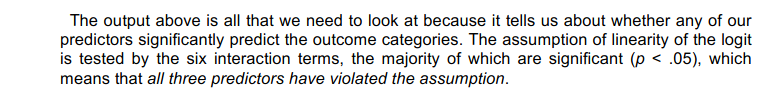

In [411]:
Image('linearity.png')